In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement


We will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. The units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

### Setting up input & target variables

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0,2.0])
y_train = np.array([300.0, 500.0])

In [3]:
print(x_train)
print(y_train)

[1. 2.]
[300. 500.]


### Number of training examples `m`

In [4]:
# Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension.
# m is the number of training examples
m = x_train.shape[0]
print(m)

2


In [5]:
# We can also use the Python `len()` function as shown below.
m = len(x_train)
print("Number of training examples is : ", m)

Number of training examples is :  2


### Training example `x_i, y_i`

We will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.

In [6]:
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print("(x^1, y^1) = (", x_i,",", y_i, ")")

(x^1, y^1) = ( 2.0 , 500.0 )


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

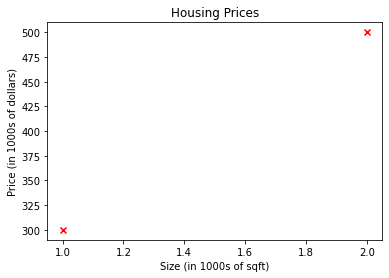

In [7]:
# Plot the data points 
plt.scatter(x_train, y_train, marker='x', c='r')
#Set the title
plt.title("Housing Prices")
#Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
#Set the x-axis label
plt.xlabel("Size (in 1000s of sqft)")
plt.show()

## Model function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 


In [8]:
# w and b are model parameters
w = 200
b = 100
print("w :", w)
print("b :", b)

w : 200
b : 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.

> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   

In [9]:
def compute_model_output(x, w, b):
    
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w  * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

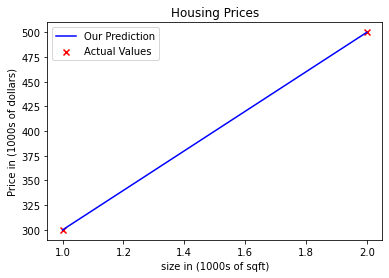

In [10]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c="b", label="Our Prediction")

# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual Values")

# Set the title
plt.title("Housing Prices")

#Set the y-axis label
plt.ylabel("Price in (1000s of dollars)")

#Set the x-axis label
plt.xlabel("size in (1000s of sqft)")

plt.legend()

plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [11]:
w = 200
b = 100
x_i = 1.2
cost_1200_sqft = w * x_i + b
print("Cost of House with size 1200 sqft is", cost_1200_sqft, "thousand dollars")

Cost of House with size 1200 sqft is 340.0 thousand dollars
